# Homework 8

February 29, 2021

In [2]:
library(MASS)
library(pvclust)
library(dendextend)
library(circlize)

In [10]:
# load data and convert from dissimilarity to distance
pics = read.csv('data_files//pic_sort_data.csv')
dis = 10 - pics[,2:17]
dim(pics)
pics
dis

[1] 16 17

pic,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16
p1,10,0,7,0,3,0,0,0,0,3,5,1,1,0,1,1
p2,0,10,1,3,1,0,0,9,2,0,0,0,0,0,0,0
p3,7,1,10,0,4,1,0,0,0,4,5,1,0,0,2,2
p4,0,3,0,10,0,0,0,1,0,0,0,1,9,9,0,0
p5,3,1,4,0,10,0,1,0,4,4,6,0,0,1,0,0
p6,0,0,1,0,0,10,8,9,0,1,0,6,0,0,0,0
p7,0,0,0,0,1,8,10,8,2,0,0,6,0,1,0,0
p8,0,9,0,1,0,9,8,10,0,0,0,8,0,0,0,0
p9,0,2,0,0,4,0,2,0,10,1,0,0,0,1,0,0
p10,3,0,4,0,4,1,0,0,1,10,7,0,0,0,0,0


p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16
0,10,3,10,7,10,10,10,10,7,5,9,9,10,9,9
10,0,9,7,9,10,10,1,8,10,10,10,10,10,10,10
3,9,0,10,6,9,10,10,10,6,5,9,10,10,8,8
10,7,10,0,10,10,10,9,10,10,10,9,1,1,10,10
7,9,6,10,0,10,9,10,6,6,4,10,10,9,10,10
10,10,9,10,10,0,2,1,10,9,10,4,10,10,10,10
10,10,10,10,9,2,0,2,8,10,10,4,10,9,10,10
10,1,10,9,10,1,2,0,10,10,10,2,10,10,10,10
10,8,10,10,6,10,8,10,0,9,10,10,10,9,10,10
7,10,6,10,6,9,10,10,9,0,3,10,10,10,10,10


In [11]:
#convert to distances, both euclidean and raw dissimilarity
euc_dis = dist(pics[,2:17], method = "euclidean") # distance matrix
nat_dis = as.dist(dis)

In [12]:
# check out single dimensional Nonmetric MDS first
d1 =  isoMDS(nat_dis, k=1)
d1

initial  value 44.749515 
final  value 44.749515 
converged


p1,4.0737613
p2,-1.7483564
p3,4.1650679
p4,-1.6100183
p5,3.8098968
p6,-4.3498229
p7,-4.5557944
p8,-5.4599394
p9,0.2568662
p10,4.0431088
p11,4.9762724


In [13]:
# check out single dimensional Nonmetric MDS first
d1 =  isoMDS(nat_dis, k=1)
d1

initial  value 44.749515 
final  value 44.749515 
converged


p1,4.0737613
p2,-1.7483564
p3,4.1650679
p4,-1.6100183
p5,3.8098968
p6,-4.3498229
p7,-4.5557944
p8,-5.4599394
p9,0.2568662
p10,4.0431088
p11,4.9762724


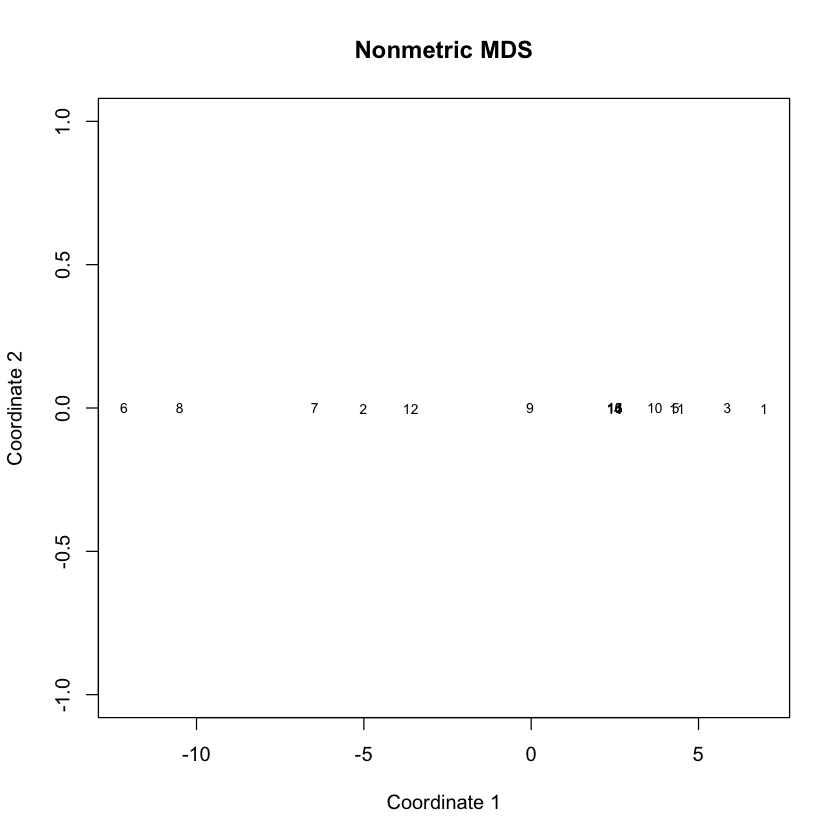

In [31]:
# plot
x = d1$points[,1]
y = rep(0,16)  
plot(x, y, xlab="Coordinate 1", ylab="Coordinate 2", main="Nonmetric MDS", type="n")
text(x, y, cex=.7)

Along this dimension there seem to be anywhere from 4 to 9 or 10 clusters, but it isn't obvious where the cutoffs should be. Let's look with 2 dimensions.

initial  value 30.400372 
iter   5 value 18.694984
iter  10 value 16.150908
iter  15 value 15.344408
iter  15 value 15.331058
iter  15 value 15.329962
final  value 15.329962 
converged


p1,2.3492358,0.5560426
p2,-1.7802715,-1.6819299
p3,2.8037832,1.6070904
p4,-2.2105224,-4.8966478
p5,4.6197227,-1.4054154
p6,-5.2031123,1.9487162
p7,-4.8620185,0.6177695
p8,-5.3956662,0.9299728
p9,4.2543005,-4.6561659
p10,5.6718234,0.3135117
p11,5.4992508,2.6462217


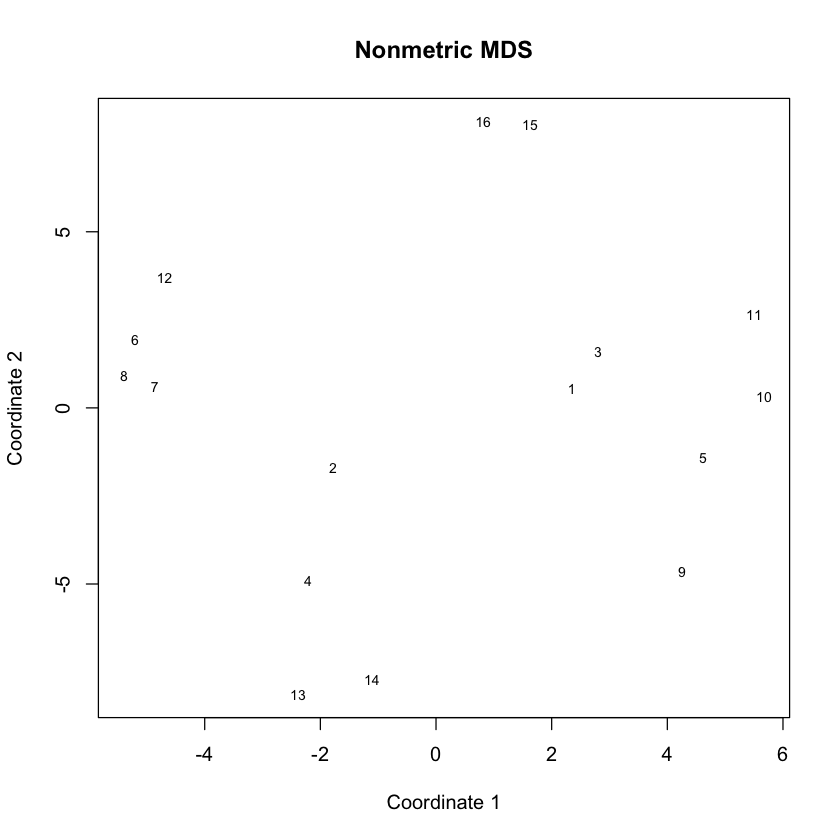

In [14]:
# check out single dimensional Nonmetric MDS first
d2 =  isoMDS(nat_dis, k=2)
d2

# plot
x = d2$points[,1]
y = d2$points[,2] 
plot(x, y, xlab="Coordinate 1", ylab="Coordinate 2", main="Nonmetric MDS", type="n")
text(x, y, cex=.7)

This makes things a bit more clear. There seems to be some natural clusters forming in 2 dimensions. Since MDS is better at capturing larger distances, this gives us a rough 5 or 6 clusters starting to form, but it isn't clear where some pictures belong. 

8, 6, 7, and 12 all have people in them and have higher negative values along dimension 1, whereas 9, 5, 10, and 11 all have buildings in them and have higher positive values. In the middle, pictures 13, 14, and 4 all have pictures of animals. So it seems dimension 1 is capturing some type of animacy.

It still isn't clear to me what dimension 2 represents, with 13 and 14 both having animals (high negative dimesion 2 values) and 15 and 16 having pictures of plants. Maybe it has something to do with reds/browns vs blues/greens.

In [15]:
# check the stress needed to reduce to different numbers of dimensions
s = rep(0,15)
for (i in 1:15) {
  fit = isoMDS(euc_dis, k=i) # k is the number of dim  ---- let's see the two-dimensional solution
  fit # view results
  s[i] = fit$stress}

initial  value 42.283889 
final  value 42.283889 
converged
initial  value 14.286518 
final  value 14.286518 
converged
initial  value 8.243383 
final  value 8.243383 
converged
initial  value 4.358972 
final  value 4.358972 
converged
initial  value 2.625017 
final  value 2.625017 
converged
initial  value 1.028494 
final  value 1.028494 
converged
initial  value 0.640474 
final  value 0.640474 
converged
initial  value 0.293502 
final  value 0.293502 
converged
initial  value 0.280125 
final  value 0.280125 
converged
initial  value 0.129253 
final  value 0.129253 
converged
initial  value 0.008795 
final  value 0.008795 
converged
initial  value 0.007613 
final  value 0.007613 
converged
initial  value 0.002754 
final  value 0.000646 
converged
initial  value 0.001096 
final  value 0.000000 
converged
initial  value 0.000000 
final  value 0.000000 
converged


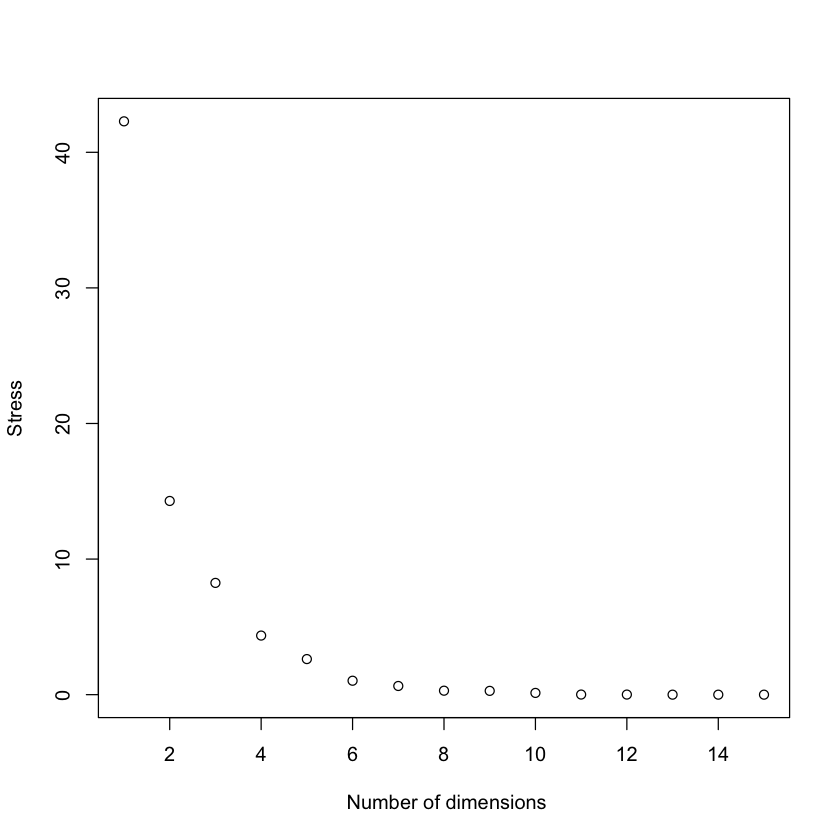

In [16]:
# plot the stress by the number of dimensions
plot(1:15,s,xlab = " Number of dimensions", ylab = "Stress")   # plot stress ~ # of dimensions 

From this stress plot, it seems that the stress asymptotes around 0 with 6 dimensions, and 5 dimensions gets stress pretty close to 0 as well. So 5 or 6 dimensions probably does a good job of clustering the distances.

initial  value 8.243383 
final  value 8.243383 
converged


7.511702,5.1548225,1.4737976
-4.163832,-1.1858567,1.6989971
7.405686,6.4279648,0.8838501
1.729999,-14.1689328,0.9270851
6.963260,4.5949928,4.9300003
-12.128060,3.1744519,1.5643353
-11.723948,2.3071493,1.7156871
-14.729706,2.1385647,2.3207563
1.449382,0.1124304,1.5971362
7.289875,5.5479014,4.4689713
9.070522,6.6724983,3.7535387


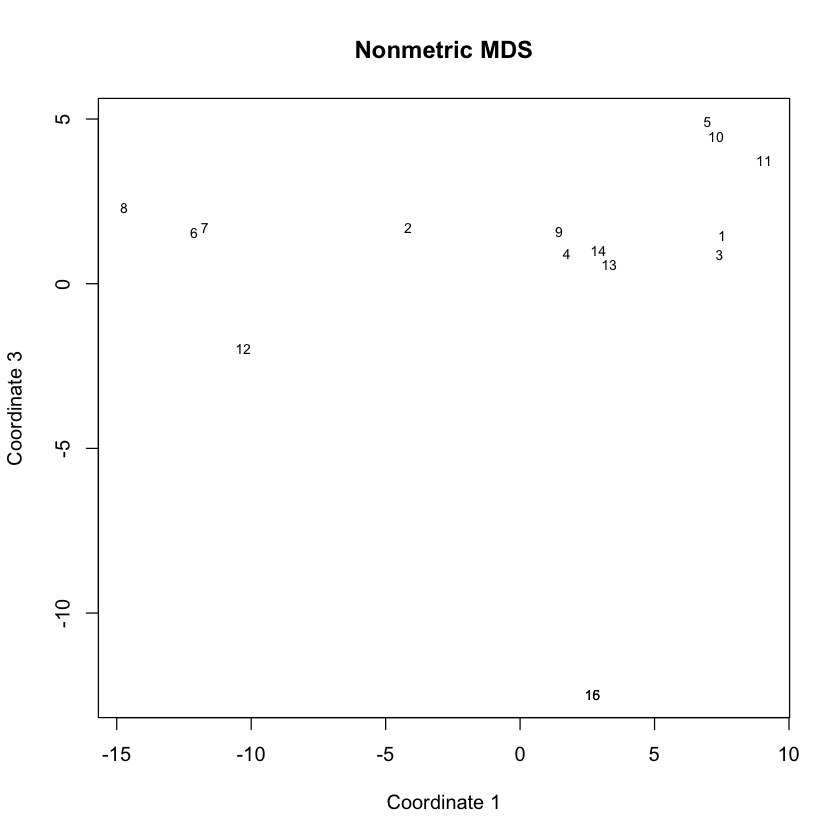

In [17]:
# check out single dimensional Nonmetric MDS first
d3 =  isoMDS(euc_dis, k=3)
d3

# plot
x = d3$points[,1]
y = d3$points[,3] 
plot(x, y, xlab="Coordinate 1", ylab="Coordinate 3", main="Nonmetric MDS", type="n")
text(x, y, cex=.7)

Interestingly here it seems 15 and 16 occupy an identical space along dimensions 1 and 3.

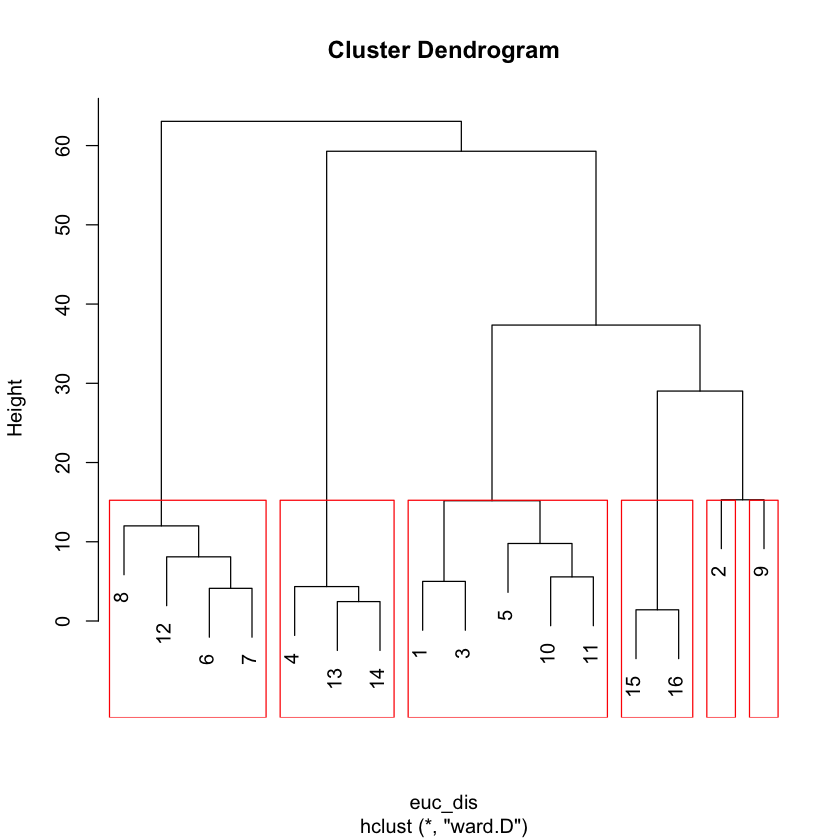

In [24]:
# Ward Hierarchical Clustering
fit = hclust(euc_dis, method="ward.D") 
plot(fit) # display dendogram
groups <- cutree(fit, k=6) # cut tree into 5 clusters
# draw dendogram with red borders around the 3 clusters 
rect.hclust(fit, k=6, border="red")

When forced to create 6 clusters, 2 and 9 end up in separate clusters, despite both being houses. Meanwhile, 15 and 16 seem to occupy a very similar if not identical space.

Bootstrap (r = 0.5)... Done.
Bootstrap (r = 0.56)... Done.
Bootstrap (r = 0.69)... Done.
Bootstrap (r = 0.75)... Done.
Bootstrap (r = 0.88)... Done.
Bootstrap (r = 1.0)... Done.
Bootstrap (r = 1.06)... Done.
Bootstrap (r = 1.19)... Done.
Bootstrap (r = 1.25)... Done.
Bootstrap (r = 1.38)... Done.


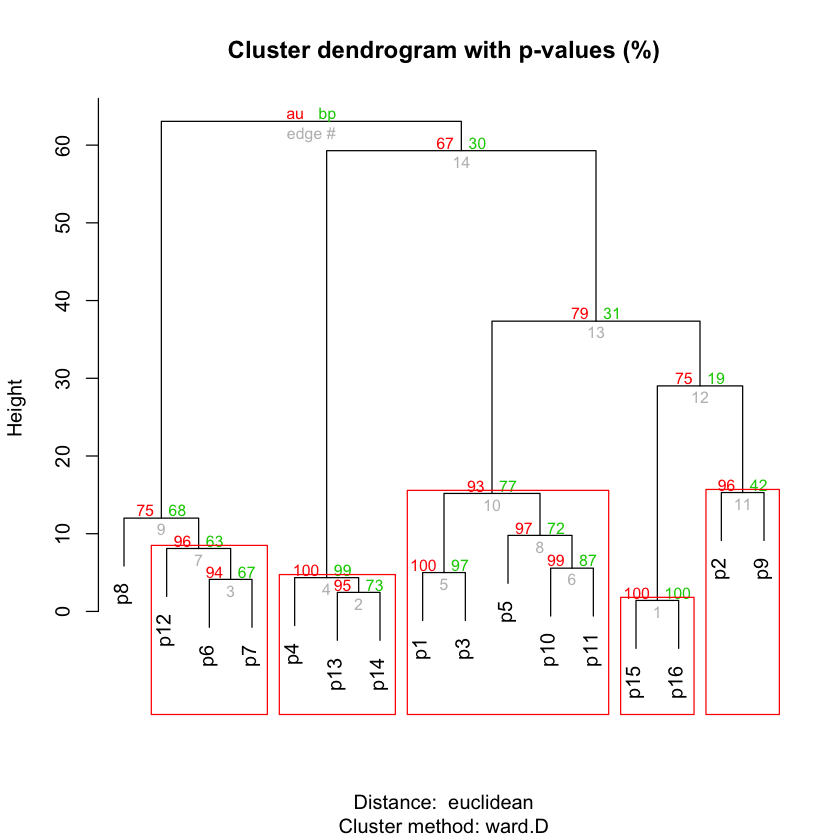

In [22]:
# Ward Hierarchical Clustering with Bootstrapped p values
fit <- pvclust(pics[,2:17], method.hclust="ward.D",
               method.dist="euclidean")
plot(fit) # dendogram with p values
# add rectangles around groups highly supported by the data
pvrect(fit, alpha=.90)

Using Ward hierarchical clustering with bootstrapped p-values, it looks like there are 5 significant clusters, which roughly correspond to clusters from our lower-dimensional visualizations. From left to right these seem to correspond to people (although 8 is maybe a bit more abstract), non-human animals, seascapes, plants, and houses. These results seem pretty reasonable, and these clusters were re-discovered from the behavioral ratings of only 17 participants!

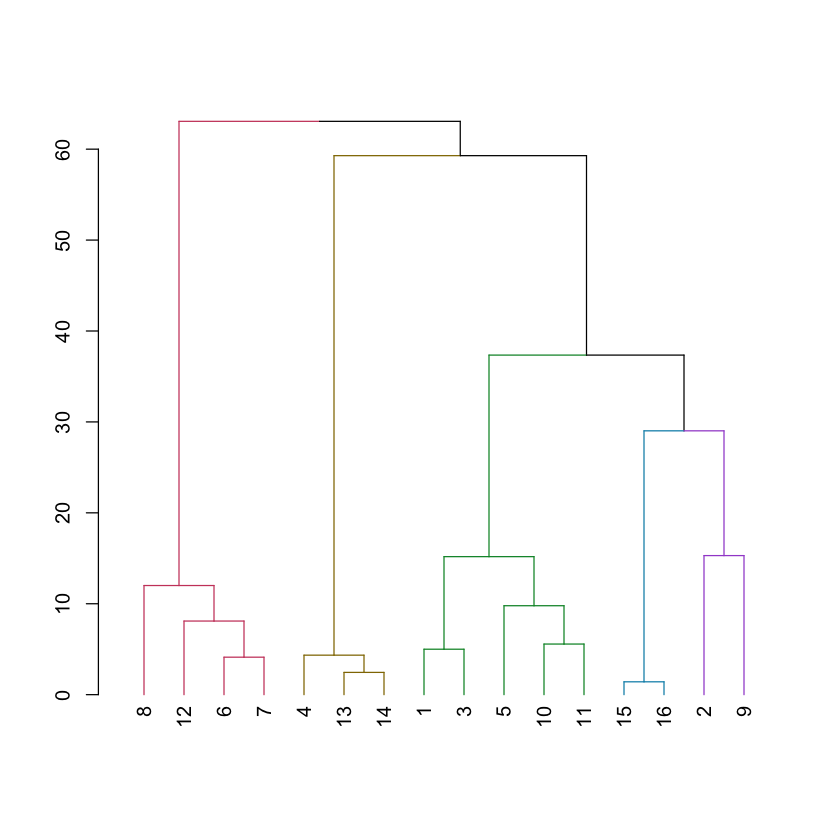

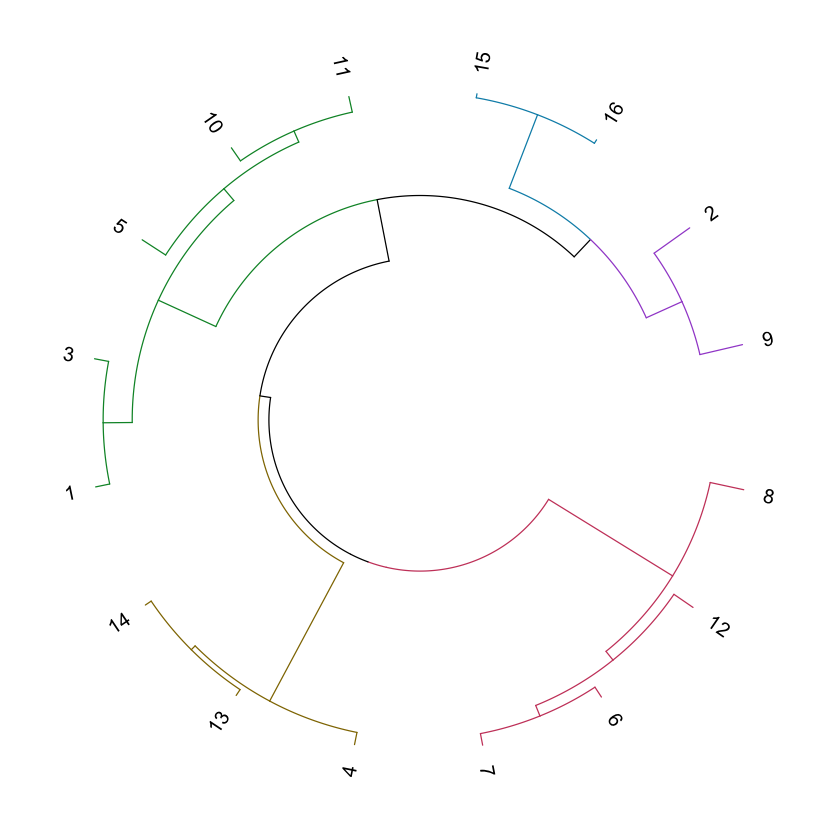

In [25]:
# add colors and circles just to see how it looks
dend = as.dendrogram(fit)
dend = color_branches(dend, k=5) # identify 5 clusters as above
plot(dend)
# Requires that the circlize package will be installed
par(mar = rep(0,4))
circlize_dendrogram(dend)